___
#  <span style="color:blue">K Means Clustering Project</span>

The objective of this project is to apply the KMeans Clustering algorithm to a dataset of universities and categorize them into two distinct groups: Private and Public. KMeans Clustering is an unsupervised learning technique that identifies similarities and differences within the dataset by dividing it into several clusters. The clusters are created based on their similarity in terms of the given features, such as size, tuition fees, location, etc.

In this case, we will utilize the features of each university to generate clusters that correspond to whether they are Private or Public institutions. Private and Public universities differ significantly in terms of funding, enrollment size, academic programs, and other factors. By clustering them into these two categories, we can gain insights into how they differ and identify patterns that may exist within each group.

One important aspect to note is that we have access to the labels for this dataset, which indicate whether a university is Private or Public. However, we will not use this information in the KMeans clustering algorithm, as it is designed to work with unsupervised datasets where labels are not available. Instead, we will use the labels to evaluate the algorithm's performance in terms of how well it is able to accurately cluster the universities into their correct categories.

Overall, this project aims to apply KMeans Clustering to a real-world dataset to gain insights into the clustering of universities based on their characteristics and to evaluate the algorithm's effectiveness in categorizing universities into their respective groups.
___

## <span style="color:green">Import Libraries</span>

** Import the libraries you usually use for data analysis.**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

## <span style="color:green"> Get the Data</span>

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [45]:
df = pd.read_csv('College_Data.csv',index_col=0)

**Check the head of the data**

In [46]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [48]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## <span style="color:green">EDA<span>

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

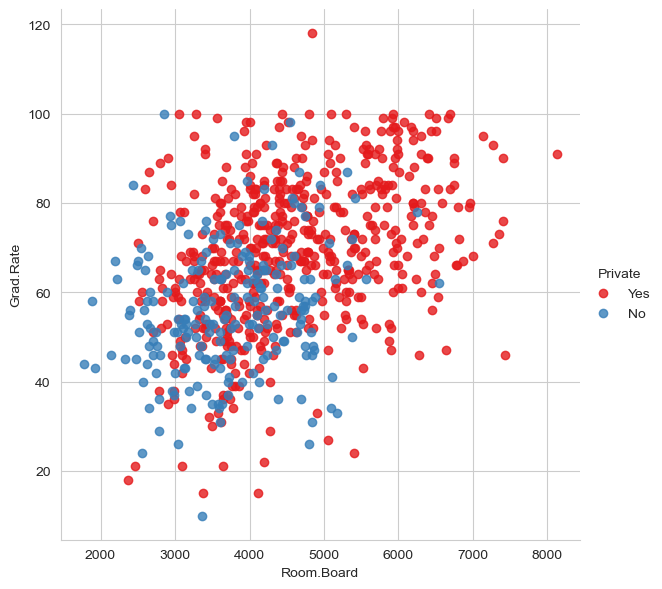

In [49]:
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',
           palette='Set1', height=6, aspect=1, fit_reg=False)
plt.show()
plt.pause(0.001)

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

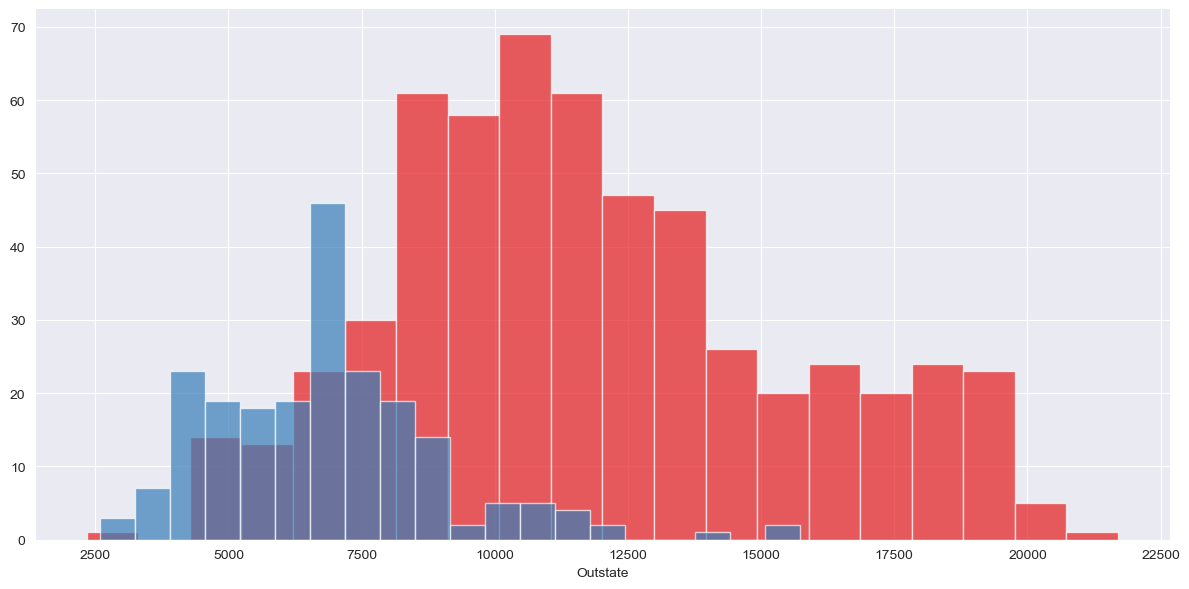

In [50]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='Set1',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)
plt.show()
plt.pause(0.001)

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [51]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Set that school's graduation rate to 100 so it makes sense. 

In [52]:
df.loc['Cazenovia College', 'Grad.Rate'] = 100

In [53]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


## <span style="color:green">K Means Cluster Creation</span>

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [54]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [55]:
# Separate the input features and target variable
X = df.drop('Private', axis=1)
y = df['Private']

In [56]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
# Balance the classes in the training dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [59]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

In [60]:
# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [61]:
X_scaled = MinMaxScaler().fit_transform(X_train)

In [62]:
# Appliquer l'algorithme K-Means pour déterminer le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


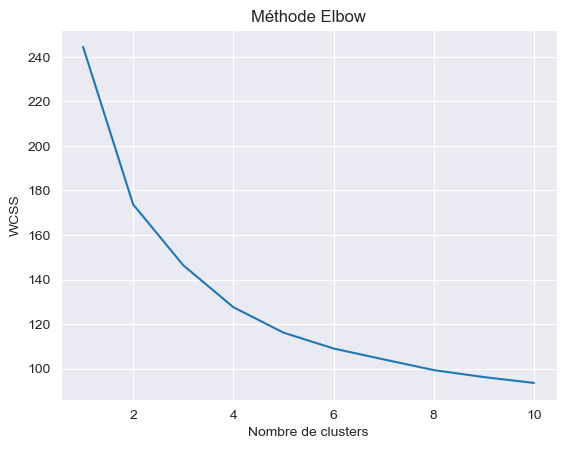

In [63]:
# Afficher le graphique "Elbow Method" pour déterminer le nombre optimal de clusters
plt.plot(range(1, 11), wcss)
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()
plt.pause(0.001)

In [64]:
# Appliquer l'algorithme K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_train)

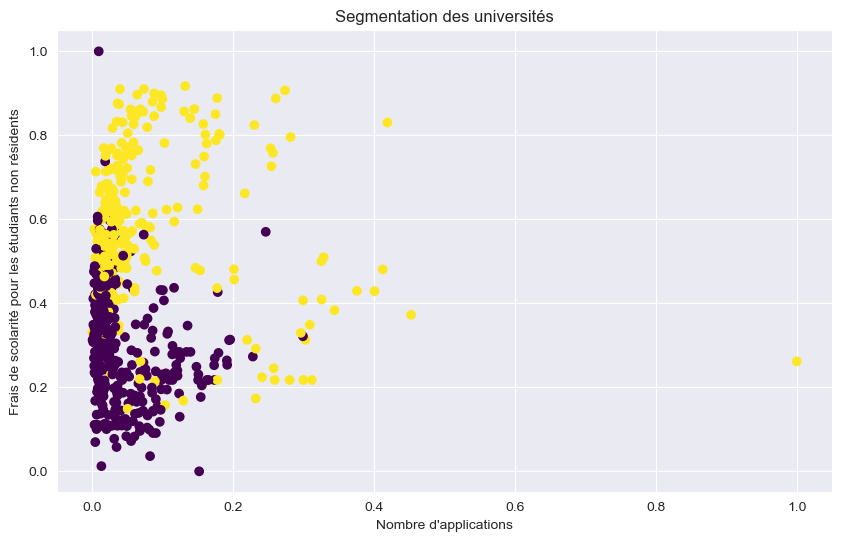

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,7], c=y_kmeans, cmap='viridis')
plt.xlabel('Nombre d\'applications')
plt.ylabel('Frais de scolarité pour les étudiants non résidents')
plt.title('Segmentation des universités')
plt.show()
plt.pause(0.001)

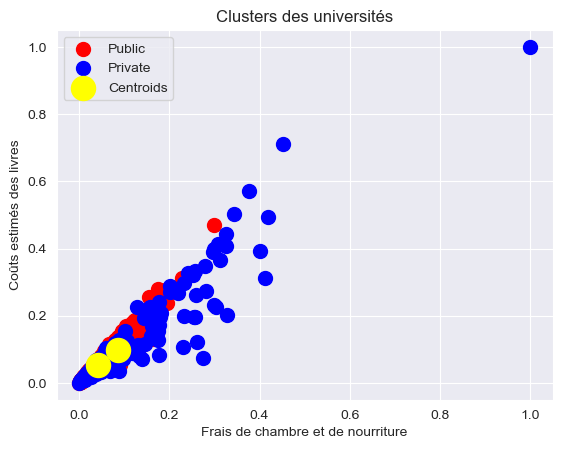

In [66]:
# Visualiser les résultats
plt.scatter(X_train[y_kmeans==0, 0], X_train[y_kmeans==0, 1], s=100, c='red', label ='Public')
plt.scatter(X_train[y_kmeans==1, 0], X_train[y_kmeans==1, 1], s=100, c='blue', label ='Private')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label ='Centroids')
plt.title('Clusters des universités')
plt.xlabel('Frais de chambre et de nourriture')
plt.ylabel('Coûts estimés des livres')
plt.legend()
plt.show()
plt.pause(0.001)

In [67]:
kmeans.cluster_centers_

array([[0.04082733, 0.0541405 , 0.09685733, 0.17768536, 0.3928796 ,
        0.09750062, 0.04236942, 0.30546817, 0.32963885, 0.19787796,
        0.18395366, 0.59323103, 0.6337301 , 0.33974476, 0.27439544,
        0.07938521, 0.5236149 ],
       [0.08600254, 0.09805516, 0.13338697, 0.42291753, 0.68785152,
        0.12115497, 0.02767319, 0.58577003, 0.51416802, 0.20626307,
        0.13368696, 0.80174057, 0.8712702 , 0.26402229, 0.46696604,
        0.18555399, 0.74466317]])

## <span style="color:green">Evaluation</span>

In [68]:
# Perform a grid search to find the best hyperparameters
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
rfc_cv.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [69]:
print("Meilleurs hyperparamètres : ", rfc_cv.best_params_)

Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [70]:
# Evaluate the model on the testing set
y_pred = rfc_cv.predict(X_test)

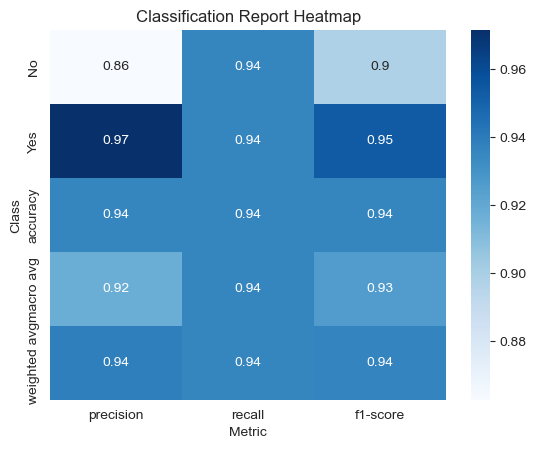

In [71]:
# Generate a classification report

cr = classification_report(y_test, y_pred, output_dict=True)

# create heatmap
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True, cmap="Blues")

# set plot labels
plt.xlabel('Metric')
plt.ylabel('Class')
plt.title('Classification Report Heatmap')
plt.show()

Confusion Matrix:


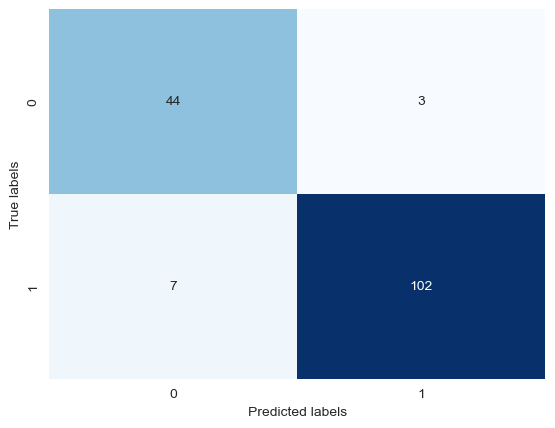

In [72]:
# Generate and Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
print("Confusion Matrix:")
plt.show()
plt.pause(0.001)